In [ ]:
# This is an GPlearn Base Run on p312c
# Install libraries
%pip install gplearn

In [ ]:
# Call Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from gplearn.genetic import SymbolicRegressor
import time
#import math
import sympy as sym

# Molecular Mass Dataset
Here we will take a first look at the molecular mass dataset, taken from [Goossens.](https://pubs.acs.org/doi/full/10.1021/ie950484l?casa_token=-Vy315d8K38AAAAA%3Anxdm5rReXldLbOrBYLfwm0l3MmsCw_Mbnw1vVdNJ308Ki_3lEcnU3bXQmS8TL2nsArNG-AydRFEKVZc)


In [ ]:
# Positron
#df=pd.read_csv('./goossens_raw.csv')
#df=pd.read_csv('./c694/goossens_raw.csv')
#Colab
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/goossens_raw.csv')

Mounted at /content/drive


In [ ]:
y=df['MW']
x=df[['SG','TBP']]

In [ ]:
t0 = time.time()
myMod=SymbolicRegressor(verbose=1)
myMod.fit(x,y)
y_pred=myMod.predict(x)
print("time to fit: ",time.time() - t0, 'seconds')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    38.25      1.85606e+23       63          120.589              N/A     19.43s
   1    29.99      1.49411e+10       31          118.396              N/A     16.76s
   2    41.20      1.49787e+06       35          118.368              N/A     16.10s
   3    48.41      3.96937e+06       47          94.8331              N/A     16.13s
   4    40.19      3.03471e+08       61          94.7432              N/A     14.72s
   5    40.15      4.03031e+06       57          88.9354              N/A     13.79s
   6    52.99      2.22273e+11       59          82.0596              N/A     13.62s
   7    63.42      3.22128e+08       45          76.5608              N/A     12.75s
   8    73.69      6.00762e+06       69          74.8741              N/A  

### Results
Let's take a peek at how the predicted molecular mass looks compared to the actual:

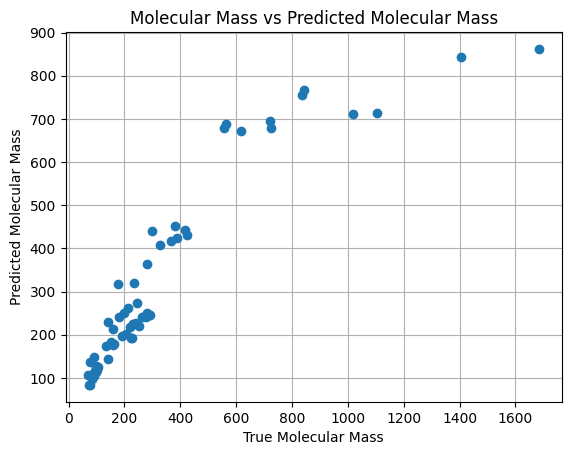

In [ ]:
plt.plot(y,y_pred,marker="o",linestyle="None")
plt.xlabel('True Molecular Mass')
plt.ylabel('Predicted Molecular Mass')
plt.title('Molecular Mass vs Predicted Molecular Mass')
plt.grid()
plt.show()

As the correlation looks reasonable, let us take a look at the equation:

In [ ]:
converter = {
    'add': lambda x, y : x + y,
    'sub': lambda x, y : x - y,
    'mul': lambda x, y : x*y,
    'div': lambda x, y : x/y,
    'sqrt': lambda x : x**0.5,
    'log': lambda x : log(x),
    'abs': lambda x : abs(x),
    'neg': lambda x : -x,
    'inv': lambda x : 1/x,
    'max': lambda x, y : max(x, y),
    'min': lambda x, y : min(x, y),
    'sin': lambda x : sin(x),
    'cos': lambda x : cos(x),
    'pow': lambda x, y : x**y,
}
myEq = sym.sympify(str(myMod._program), locals=converter)
myEq

-X0**2 - 0.427962969173543*X0**2*(1.32538330494037*X1 + 3.09695791554086*(X0 - 0.536)*(X1 - 0.75)/X0**2)*(-X0*X1 - 1.32538330494037*X0 + 1.32538330494037*X1)/((-1.32538330494037*X0 + 1.32538330494037*X1)*(X0 - 0.536)*(X1 - 0.75)) - 0.444276*X0*(-X1 - 0.304)

This looks dramatically different.  Lets us clean it up a bit:

In [ ]:
sym.simplify(myEq)

0.754498714652956*(1.32538330494037*X0*(X0 - 0.536)*(X0 - X1)*(X1 - 0.75)*(-X0 + 0.444276*X1 + 0.135059904) - 0.427962969173543*(1.32538330494037*X0**2*X1 + 3.09695791554086*(X0 - 0.536)*(X1 - 0.75))*(X0*X1 + 1.32538330494037*X0 - 1.32538330494037*X1))/((X0 - 0.536)*(X0 - X1)*(X1 - 0.75))

In [ ]:
# Add Prediction to Dataframe
df['Fit_Mw']=y_pred
# Calculate Correlation Coefficient between columns
df.corr()

,SG,TBP,MW,Fit_Mw
SG,1.000000,0.625218,0.334852,0.478244
TBP,0.625218,1.000000,0.869591,0.941076
MW,0.334852,0.869591,1.000000,0.919382
Fit_Mw,0.478244,0.941076,0.919382,1.000000


In [ ]:
# Import Hosseinifar Dataset

# Colab Version
#drive.mount('/content/drive')
dfh=pd.read_csv('/content/drive/MyDrive/hosseinifar_raw.csv')
# Positron Version
#dfh=pd.read_csv('./hosseinifar_raw.csv')
# RStudio Version
# dfh=pd.read_csv('./c694/goossens_raw.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Predict Hosseinifar
yh=dfh['MW']
xh=dfh[['SG','TBP']]
y_hoss=myMod.predict(xh)

In [ ]:
# New Correlation Table
dfh['Fit_Mw']=y_hoss
dfh.corr()

,SG,TBP,MW,Fit_Mw
SG,1.000000,0.985561,0.954145,0.901412
TBP,0.985561,1.000000,0.990235,0.957381
MW,0.954145,0.990235,1.000000,0.987541
Fit_Mw,0.901412,0.957381,0.987541,1.000000
